<a href="https://colab.research.google.com/github/JTassinari10/456FinalCNN/blob/main/Oscar_Herrera_Project_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#Importing necessary python libraries
import tensorflow as tf
from tensorflow import keras
import sklearn
import numpy as np
np.random.seed(42)
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import cv2


The next following lines will crate a connection to kaggle which will allow for direct dowload of the dataset

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/             #Uses Kaggle API token
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d prasunroy/natural-images

 96% 329M/342M [00:10<00:00, 31.1MB/s]
100% 342M/342M [00:10<00:00, 35.7MB/s]


In [4]:
!unzip natural-images.zip     #Unzips images from zip folder

Streaming output truncated to the last 5000 lines.
  inflating: natural_images/cat/cat_0204.jpg  
  inflating: natural_images/cat/cat_0205.jpg  
  inflating: natural_images/cat/cat_0206.jpg  
  inflating: natural_images/cat/cat_0207.jpg  
  inflating: natural_images/cat/cat_0208.jpg  
  inflating: natural_images/cat/cat_0209.jpg  
  inflating: natural_images/cat/cat_0210.jpg  
  inflating: natural_images/cat/cat_0211.jpg  
  inflating: natural_images/cat/cat_0212.jpg  
  inflating: natural_images/cat/cat_0213.jpg  
  inflating: natural_images/cat/cat_0214.jpg  
  inflating: natural_images/cat/cat_0215.jpg  
  inflating: natural_images/cat/cat_0216.jpg  
  inflating: natural_images/cat/cat_0217.jpg  
  inflating: natural_images/cat/cat_0218.jpg  
  inflating: natural_images/cat/cat_0219.jpg  
  inflating: natural_images/cat/cat_0220.jpg  
  inflating: natural_images/cat/cat_0221.jpg  
  inflating: natural_images/cat/cat_0222.jpg  
  inflating: natural_images/cat/cat_0223.jpg  
  inflati

The next lines will convert the Natural images data into the appropriate format to feed into the neural network. 


In [8]:
cv2.imread('natural_images/person/person_0928.jpg').shape   # Checks the shape of a single image

(256, 256, 3)

In [9]:
labels =['airplane','car','cat','dog','flower','fruit','motorbike','person']  #Labels for the images are inputted manually but can also be extracted

In [10]:
X=[]   #Creates 2 variables X and Y which will contain the image in array form and the labels
y=[]
def New_data():
  for category in labels:  
    path = os.path.join('/content/data/natural_images',category)  
    classes = labels.index(category) 
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img)) 
        new_array = cv2.resize(img_array, (150, 150))
        X.append(new_array)
        y.append(classes)
New_data()

In [11]:
X = np.array(X).reshape(-1, 150, 150, 3)  #Need to convert X into a Numpy array 

In [12]:
X.shape

(6899, 150, 150, 3)

In [13]:
y=np.array(y)           # y is also converted into Numpy array
y

array([0, 0, 0, ..., 7, 7, 7])

In [14]:
from sklearn.preprocessing import LabelEncoder    #Needed to convert the data in y into categorica; 
y_transf = LabelEncoder().fit_transform(y)
from tensorflow.keras.utils import to_categorical
y_cat = to_categorical(y_transf)

In [15]:
rand=np.arange(X.shape[0])    # Data needs to be shuffled
np.random.seed(25)
np.random.shuffle(rand)
X=X[rand]
y=y_cat[rand]

In [16]:
y     # Checking for appropriate format

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

The next lines divide the data into training, validation and testing


In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.1)    #Using 10% as testing

In [18]:
x_train.shape     

(6209, 150, 150, 3)

In [19]:
len(y_train)

6209

In [20]:
x_train, x_valid = x_train[:-690], x_train[-690:]     #Creation of Validation set which will also be 10%
y_train, y_valid = y_train[:-690], y_train[-690:]

In [21]:
x_train.shape

(5519, 150, 150, 3)

In [22]:
x_valid.shape

(690, 150, 150, 3)

The following model is based on the demo from Dr. Zhang on building CNN's

In [23]:
cnn = tf.keras.models.Sequential( #initializing the CNN
[tf.keras.layers.Conv2D(32,(3,3), activation="relu",padding = "same",input_shape=x_train.shape[1:]), #Convolution 1
tf.keras.layers.MaxPool2D(2,2), #Pooling 1
tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding = "same"), #Convolution 2
tf.keras.layers.Dropout(0.5), #Dropout 1
tf.keras.layers.MaxPool2D(2,2), #Pooling 2
tf.keras.layers.Flatten(), #Flaterning
tf.keras.layers.Dense(units=64, activation="relu"),#Full Connection1
tf.keras.layers.Dropout(0.25), #Droput 2
tf.keras.layers.Dense(units=8, activation= "softmax")])#Output layer

In [24]:
cnn.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [25]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 87616)             0

In [26]:
history = cnn.fit(x_train, y_train, batch_size = 50, epochs=15, validation_data=(x_valid, y_valid))

Epoch 1/15
111/111 [==============================] - 20s 76ms/step - loss: 93.4857 - accuracy: 0.3885 - val_loss: 1.0646 - val_accuracy: 0.6768
Epoch 2/15
111/111 [==============================] - 8s 72ms/step - loss: 1.0257 - accuracy: 0.6653 - val_loss: 0.7239 - val_accuracy: 0.7623
Epoch 3/15
111/111 [==============================] - 8s 70ms/step - loss: 0.6565 - accuracy: 0.7840 - val_loss: 0.6788 - val_accuracy: 0.7696
Epoch 4/15
111/111 [==============================] - 8s 70ms/step - loss: 0.4590 - accuracy: 0.8409 - val_loss: 0.6553 - val_accuracy: 0.7884
Epoch 5/15
111/111 [==============================] - 8s 70ms/step - loss: 0.4296 - accuracy: 0.8627 - val_loss: 0.6987 - val_accuracy: 0.7739
Epoch 6/15
111/111 [==============================] - 8s 70ms/step - loss: 0.3822 - accuracy: 0.8761 - val_loss: 0.6489 - val_accuracy: 0.8087
Epoch 7/15
111/111 [==============================] - 8s 71ms/step - loss: 0.3266 - accuracy: 0.8931 - val_loss: 0.6474 - val_accuracy: 0.78

In [27]:
score = cnn.evaluate(x_test, y_test)

22/22 [==============================] - 1s 29ms/step - loss: 0.7749 - accuracy: 0.7855


In [28]:
print('Total loss on Testing Set:', score[0])

Total loss on Testing Set: 0.7749480605125427


In [29]:
print('Accuracy of Testing Set:', score[1])

Accuracy of Testing Set: 0.7855072617530823


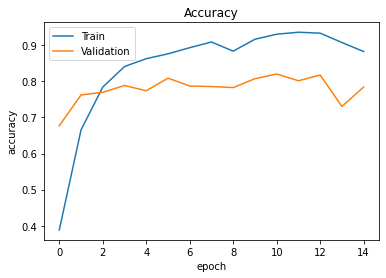

In [30]:
#Plot of training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


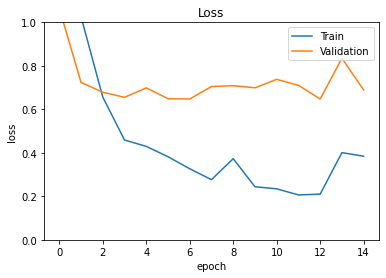

In [32]:
# Plot of training and validation loss
ax = plt.gca()
ax.set_ylim([0, 1])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
